## Predict Number of Pop in Food Desert

https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
<br>y_test ≈ prediction
<br>REFERENCE: 21.01.Stu_Respiratory_Disease

In [22]:
# https://xcitech.github.io/tutorials/heroku_tutorial/
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [24]:
# Select which data set to use as a model and import related csv (ML_TRAIN contains both 2010 and 2015)
read_df = pd.read_csv('ML_Input/ML_2015_CLEAN.csv', encoding='utf-8')

In [25]:
# read_df.columns

In [26]:
# Check data types
print(read_df.dtypes)
read_df.head()

GeoID            int64
Year             int64
D_Etab           int64
D_Emp            int64
D_Pay            int64
G_Etab           int64
G_Emp            int64
G_Pay            int64
Pop_2015         int64
FD_num_2015      int64
FD_pct_2015    float64
D_Cap            int64
G_Cap            int64
dtype: object


,GeoID,Year,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,Pop_2015,FD_num_2015,FD_pct_2015,D_Cap,G_Cap
0,1001,2015,11,93,1703,5,283,5691,55035,17497,32.06,5003,11007
1,1003,2015,50,429,7054,30,1774,36515,203690,30561,16.77,4073,6789
2,1005,2015,8,60,844,4,159,2733,26270,6070,22.11,3283,6567
3,1007,2015,5,40,596,5,111,2497,22561,969,4.23,4512,4512
4,1015,2015,34,263,4461,29,832,15066,115285,27786,23.43,3390,3975


In [27]:
# read_df.describe()

In [28]:
# read_df.corr()

In [7]:
read_df.columns

Index(['GeoID', 'Year', 'D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay',
       'Pop', 'FD_num', 'FD_pct', 'D_Cap', 'G_Cap'],
      dtype='object')

### Train model & Set Target

In [29]:
target = "FD_num_2015"
# target = "FD_num" ## Name of target column in ML_TRAIN csv

# Select columns for machine learning processing
mldf = read_df[['D_Etab', 'D_Emp', 'D_Pay', 'G_Etab','G_Emp', 'G_Pay', 
                'D_Cap', 'G_Cap', target]]
# mldf = read_df.iloc[:, 2:] # Use all columns
mldf.tail()

,D_Etab,D_Emp,D_Pay,G_Etab,G_Emp,G_Pay,D_Cap,G_Cap,FD_num_2015
1498,7,67,1197,4,129,3900,2222,3888,8589
1499,8,96,2070,8,405,9088,5044,5044,5270
1500,10,84,1136,10,635,13946,9718,9718,31924
1501,7,70,736,6,186,3966,2679,3126,2479
1502,6,55,960,8,562,12233,13698,10273,32267


In [30]:
# REFERENCE: 21.01.Stu_Respiratory_Disease
# Assign X (data) & y (target)

X = mldf.drop(target, axis=1) # drop target feature column
y = mldf[target].values.reshape(-1, 1)
print(X.shape, y.shape)

(1503, 8) (1503, 1)


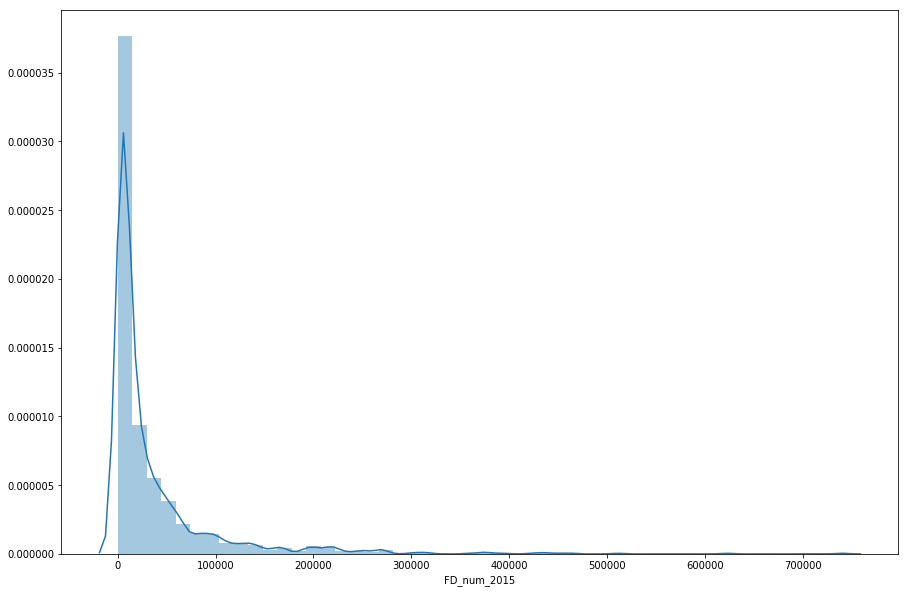

In [31]:
# Plot Target column to check quality of data
import seaborn as seabornInstance 

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(mldf[target])

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
# from sklearn.preprocessing import StandardScaler

# # Create a StandardScater model and fit it to the training data
# X_scaler= StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [34]:
# # MIN MAX SCALAR

# from sklearn.preprocessing import MinMaxScaler
# X_scaler = MinMaxScaler().fit(X_train)
# y_scaler = MinMaxScaler().fit(y_train)

In [35]:
# # Transform the training and testing data using the X_scaler and y_scaler models
# X_train_std = X_scaler.transform(X_train)
# X_test_std = X_scaler.transform(X_test)
# y_train_std = y_scaler.transform(y_train)
# y_test_std = y_scaler.transform(y_test)

In [36]:
# Create Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
predictions = model.predict(X_test)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

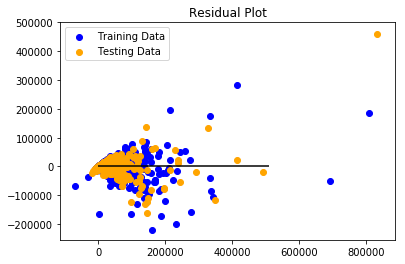

In [38]:
# Plot data selection
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")

plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions).round()
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

# 2015 Comparison
# Good MSE = 0. Good R2 = 1.
# MSE: 0.3304529371780043, R2: 0.6479262717877914

# 2010 Comparison
# MSE: 0.418649717790164, R2: 0.5060741987745555

MSE: 1018471622.0, R2: 0.7455774164597135


In [40]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

# 2015 Comparison
# Training Score: 0.851124649670741
# Testing Score: 0.8232257029591146

# 2010 Comparison
# Training Score: 0.8369746061032074
# Testing Score: 0.6064356663269095

Training Score: 0.8120034100776896
Testing Score: 0.7455774164597135


In [41]:
print('Columns:', X.columns)
print('Weight coefficients: ', model.coef_.round())
print('y-axis intercept: ', model.intercept_.round())

#Comparison
# 2015 y-axis intercept:  -12198
# 'D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay', 'D_Cap', 'G_Cap'
#  850       153      -9       -256      21       0        13       0     Year: 2015
#  484       572      -31      -268      31       0        7        2      Year: 2010
# 2010 y-axis intercept:  -18879


Columns: Index(['D_Etab', 'D_Emp', 'D_Pay', 'G_Etab', 'G_Emp', 'G_Pay', 'D_Cap',
       'G_Cap'],
      dtype='object')
Weight coefficients:  [[ 787.  162.   -9. -266.   27.   -1.    2.    1.]]
y-axis intercept:  [-15565.]


In [42]:
pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten().astype(int)})
pred_df.head()

,Actual,Predicted
0,4997,-4986
1,5301,4242
2,27649,53069
3,3131,17896
4,19670,27600


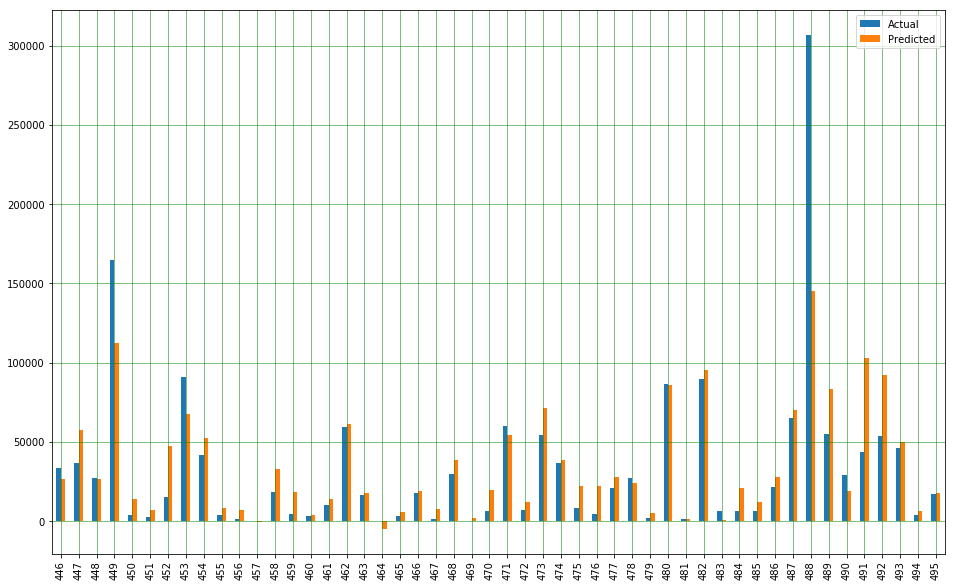

In [43]:
df1 = pred_df.tail(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()